# Future City Temperature Predictions

In [2]:
from pandas_datareader import data as pdr #read data from yahoo finance api
import matplotlib.pyplot as plt #viz #GUI manager
import seaborn as sns #viz #plotly is another package
import datetime
import pandas as pd
import numpy as np
from pandas import Grouper #groupby
#statistical data exploration, conducting statistical tests, and estimation of different statistical models
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf #autocorrelation plot
from statsmodels.tsa.api import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing # double and triple exponential smoothing
from pandas.plotting import autocorrelation_plot #autocorrelation plot
from statsmodels.graphics.gofplots import qqplot #residual diagnostics
from sklearn.metrics import mean_squared_error #accuracy metrics
from math import sqrt
from sklearn.metrics import mean_absolute_error #accuracy metrics

from random import gauss #create gaussian white noise
from random import seed
from pandas import Series

from statsmodels.tsa.stattools import adfuller # Augmented Dickey Fuller test for testing stationarity

from statsmodels.tsa.arima_model import ARIMA #for manual ARIMA

import pmdarima as pm #auto arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing

from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [25]:
top_50_df = pd.read_csv(#'../../Data/Cleaned/top_50_world_city_temp.csv',
                        'Data/Cleaned/top_50_world_city_temp.csv',
                            parse_dates=['dt'],
                            index_col=['dt'])
top_50_df

,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
dt,,,,,,
1900-02-01,3.219,0.699,Atlanta,United States,34.56N,83.68W
1900-03-01,8.194,0.230,Atlanta,United States,34.56N,83.68W
1900-04-01,14.339,0.413,Atlanta,United States,34.56N,83.68W
1900-05-01,18.433,0.524,Atlanta,United States,34.56N,83.68W
1900-06-01,21.791,1.235,Atlanta,United States,34.56N,83.68W
...,...,...,...,...,...,...
2013-04-01,21.968,0.809,Hong Kong,China,21.70N,113.37E
2013-05-01,26.226,0.402,Hong Kong,China,21.70N,113.37E
2013-06-01,28.283,0.503,Hong Kong,China,21.70N,113.37E


## Please enter the city of interest below. Current city options are shown below.

In [26]:
top_50_df['City'].unique()

array(['Atlanta', 'Bangkok', 'Barcelona', 'Mumbai', 'Boston', 'Cairo',
       'Kolkata', 'Chicago', 'Dallas', 'Delhi', 'Denver', 'Detroit',
       'Tehran', 'Guangzhou', 'Houston', 'Istanbul', 'Jakarta', 'Osaka',
       'Buenos Aires', 'London', 'Los Angeles', 'Madrid', 'Manila',
       'Melbourne', 'Mexico City', 'Miami', 'Milan', 'Minneapolis',
       'Montreal', 'Moscow', 'New York', 'Paris', 'Beijing',
       'Philadelphia', 'Phoenix', 'Rio de Janeiro', 'Riyadh', 'Rome',
       'Sao Paulo', 'San Diego', 'San Francisco', 'Seattle', 'Seoul',
       'Shanghai', 'Singapore', 'Sydney', 'Tokyo', 'Toronto',
       'Washington DC', 'Hong Kong'], dtype=object)

In [27]:
city_chosen = input("Please enter the city you want temperature predictions for: ")
print(f"You have chosen '{city_chosen}'. We will now get you future temperature predictions!")

Please enter the city you want temperature predictions for: Cairo
You have chosen 'Cairo'. We will now get you future temperature predictions!


In [28]:
chosen_city_df = top_50_df[top_50_df['City'] == city_chosen]

In [29]:
chosen_city_df

,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
dt,,,,,,
1900-02-01,15.434,0.512,Cairo,Egypt,29.74N,31.38E
1900-03-01,18.151,0.436,Cairo,Egypt,29.74N,31.38E
1900-04-01,21.031,0.492,Cairo,Egypt,29.74N,31.38E
1900-05-01,25.481,0.597,Cairo,Egypt,29.74N,31.38E
1900-06-01,26.990,0.457,Cairo,Egypt,29.74N,31.38E
...,...,...,...,...,...,...
2013-04-01,21.146,0.477,Cairo,Egypt,29.74N,31.38E
2013-05-01,27.100,0.254,Cairo,Egypt,29.74N,31.38E
2013-06-01,28.392,0.482,Cairo,Egypt,29.74N,31.38E


In [30]:
temperature_df = chosen_city_df['AverageTemperature']
temperature_df = temperature_df.to_frame()
temperature_df

,AverageTemperature
dt,
1900-02-01,15.434
1900-03-01,18.151
1900-04-01,21.031
1900-05-01,25.481
1900-06-01,26.990
...,...
2013-04-01,21.146
2013-05-01,27.100
2013-06-01,28.392


<Axes: xlabel='dt'>

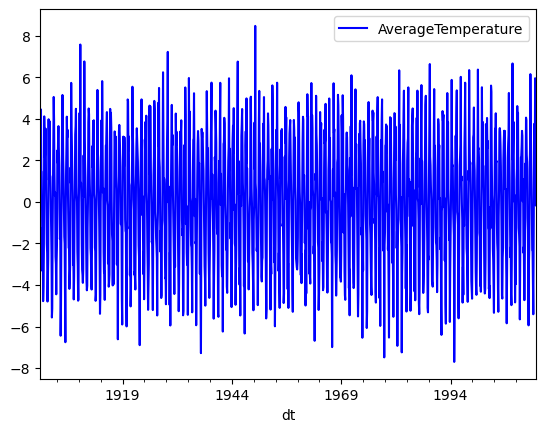

In [31]:
#create differenced dataset
first_diff_df = temperature_df.diff().dropna()
first_diff_df.plot(color='blue')

In [32]:
X = first_diff_df.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -15.256821
p-value: 0.000000
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568


# Our data is showing stationary so we can proceed with modeling.

# Train Test Split

In [33]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(temperature_df, test_size=12, random_state=25, shuffle = False)
#shuffle = False is very important to ensure the order of the data

print(f"No. of training examples: {train_data.shape[0]}")
print(f"No. of testing examples: {test_data.shape[0]}")

No. of training examples: 1351
No. of testing examples: 12


In [34]:
train_data

,AverageTemperature
dt,
1900-02-01,15.434
1900-03-01,18.151
1900-04-01,21.031
1900-05-01,25.481
1900-06-01,26.990
...,...
2012-04-01,22.612
2012-05-01,26.428
2012-06-01,28.905


In [35]:
test_data

,AverageTemperature
dt,
2012-09-01,27.467
2012-10-01,25.086
2012-11-01,20.931
2012-12-01,15.522
2013-01-01,14.187
2013-02-01,15.931
2013-03-01,19.695
2013-04-01,21.146
2013-05-01,27.100


# Evaluator Function
We can use this to evaluate our different models

In [36]:
def evaluate_model(model, test_data):
    # Make predictions
    predictions = model.predict(start=test_data.index[0], end=test_data.index[-1])

    # Calculate Mean Squared Error (MSE)
    mse = mean_squared_error(test_data, predictions)

    return mse, predictions

# Auto ARIMA
Note that our data was showing stationarity after doing a first order difference, which would indicate to us that the model does not have a seasonal component. However, we can let the auto ARIMA test whether we need to do differencing for trend and seasonality simply by setting d and D equal to "None". This will make our code more robust.

In [37]:
smodel = pm.auto_arima(train_data, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=None, trace=True,
                         error_action='ignore',
                         suppress_warnings=True,
                         stepwise=True, return_valid_fits=True)

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,1)[12] intercept   : AIC=5736.159, Time=2.49 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=8477.405, Time=0.10 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=inf, Time=5.52 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=6326.391, Time=3.04 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=12217.874, Time=0.13 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=6158.248, Time=0.91 sec
 ARIMA(1,0,1)(1,0,1)[12] intercept   : AIC=inf, Time=6.31 sec
 ARIMA(1,0,1)(0,0,2)[12] intercept   : AIC=5404.821, Time=8.54 sec
 ARIMA(1,0,1)(1,0,2)[12] intercept   : AIC=inf, Time=18.12 sec
 ARIMA(0,0,1)(0,0,2)[12] intercept   : AIC=5809.777, Time=4.58 sec
 ARIMA(1,0,0)(0,0,2)[12] intercept   : AIC=5503.748, Time=4.45 sec
 ARIMA(2,0,1)(0,0,2)[12] intercept   : AIC=4515.405, Time=20.27 sec
 ARIMA(2,0,1)(0,0,1)[12] intercept   : AIC=4553.339, Time=6.21 sec
 ARIMA(2,0,1)(1,0,2)[12] intercept   : AIC=inf, Time=19.24 sec
 ARIMA(2,0,1)(1,0,1)[12] intercept 

# Best ARIMA Models

We set return_valid_fits=True so we can now directly access the best models as the are stored in order of best to worst by the auto ARIMA. We will take the best 3 models.

In [38]:
best_model = smodel[0]
second_best_model = smodel[1]
third_best_model = smodel[2]

In [39]:
print(best_model)
print(second_best_model)
print(third_best_model)

 ARIMA(2,0,2)(2,0,1)[12]          
 ARIMA(2,0,2)(1,0,2)[12]          
 ARIMA(2,0,3)(2,0,1)[12]          


In [40]:
best_order = smodel[0].order
best_order_seasonal = smodel[0].seasonal_order

second_best_order = smodel[1].order
second_best_order_seasonal = smodel[1].seasonal_order


third_best_order = smodel[2].order
third_best_order_seasonal = smodel[2].seasonal_order

In [41]:
print(best_order,best_order_seasonal)
print(second_best_order,second_best_order_seasonal)
print(third_best_order,third_best_order_seasonal)

(2, 0, 2) (2, 0, 1, 12)
(2, 0, 2) (1, 0, 2, 12)
(2, 0, 3) (2, 0, 1, 12)


In [42]:
best_model = SARIMAX(train_data, order=best_order, seasonal_order=best_order_seasonal)
best_model_fit = best_model.fit(disp=False)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [43]:
second_best_model = SARIMAX(train_data ,order=second_best_order, seasonal_order=second_best_order_seasonal)
second_best_model_fit = second_best_model.fit(disp=False)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [44]:
third_best_model = SARIMAX(train_data, order=third_best_order, seasonal_order=third_best_order_seasonal)
third_best_model_fit = third_best_model.fit(disp=False)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization fai

In [45]:
mse_best_model, predictions_best_model = evaluate_model(best_model_fit, test_data)

In [46]:
mse_second_best_model, predictions_second_best_model = evaluate_model(second_best_model_fit, test_data)

In [47]:
mse_third_best_model, predictions_third_best_model = evaluate_model(third_best_model_fit, test_data)

# Exponential Smoothing Models

In [48]:
ets_model_add_add = ExponentialSmoothing(train_data, trend='add', seasonal='add', seasonal_periods=12)



/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [49]:
ets_model_add_add_fit = ets_model_add_add.fit()

In [50]:
mse_ets_add_add, predictions_ets_add_add = evaluate_model(ets_model_add_add_fit, test_data)

NOTE: If we want to use multiplicative we need to do some data transformation. We may want to run a model with our trend = 'mul' since we may be thinking of things like gloabl warming. However, we do not need seasonal = 'mul'.

In [ ]:
# ets_model_add_add = ExponentialSmoothing(train_data, trend='mul', seasonal='add', seasonal_periods=12)
# #ets_model_add_add_fit = ets_model_add_add.fit()

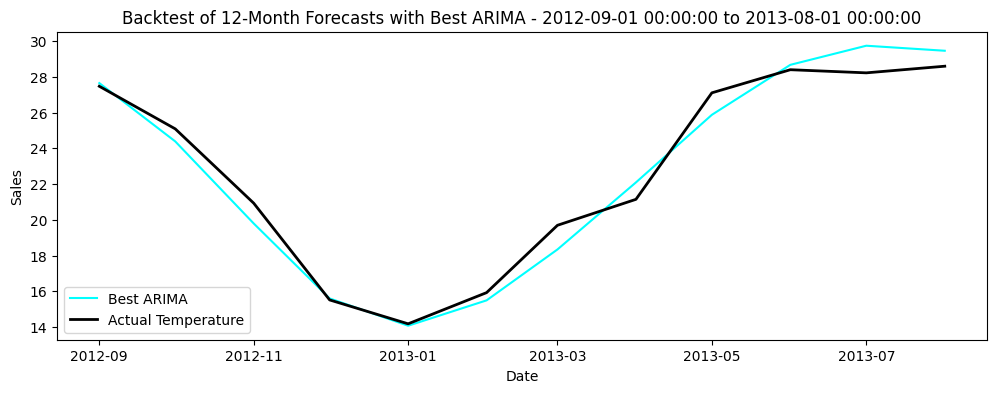

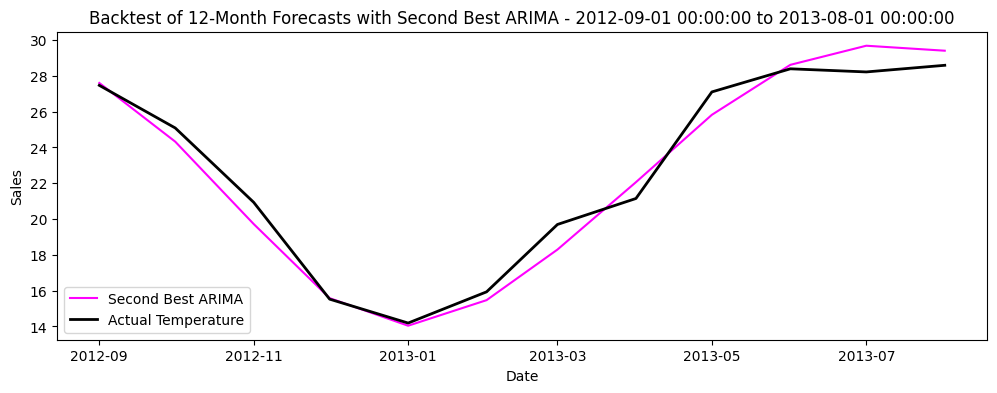

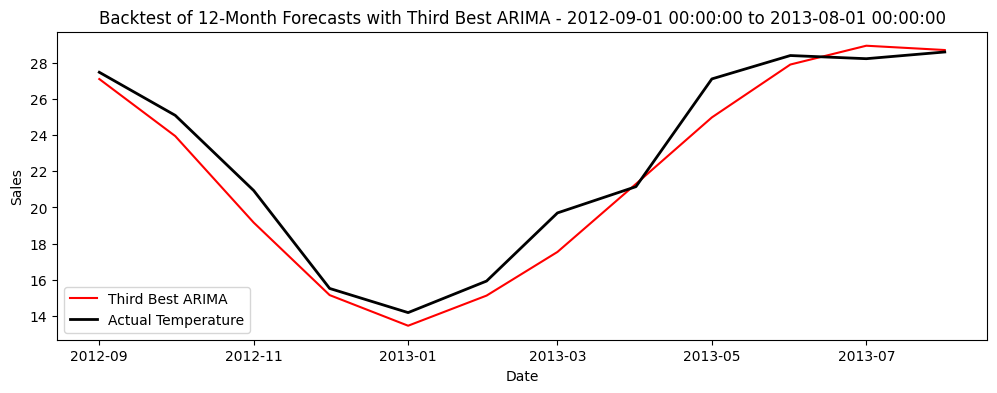

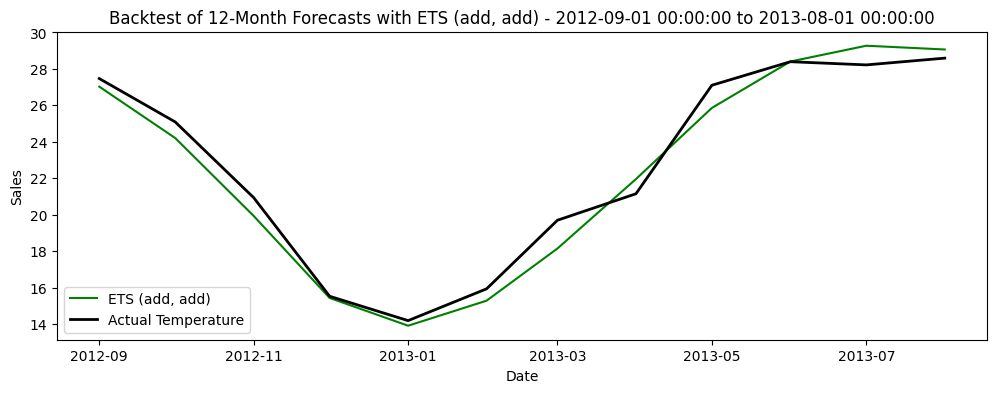

In [51]:
plt.figure(figsize=(12, 4))
plt.plot(test_data.index, predictions_best_model, label='Best ARIMA', color = "cyan")
plt.plot(test_data.index, test_data['AverageTemperature'], label='Actual Temperature', color='black', linewidth=2)
plt.title(f'Backtest of 12-Month Forecasts with Best ARIMA - {test_data.index[0]} to {test_data.index[-1]}')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

# Plot for ARIMA model 2 "Second Best"
plt.figure(figsize=(12, 4))
plt.plot(test_data.index, predictions_second_best_model, label='Second Best ARIMA', color = "magenta")
plt.plot(test_data.index, test_data['AverageTemperature'], label='Actual Temperature', color='black', linewidth=2)
plt.title(f'Backtest of 12-Month Forecasts with Second Best ARIMA - {test_data.index[0]} to {test_data.index[-1]}')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

# Plot for ARIMA model 3 "Third Best"
plt.figure(figsize=(12, 4))
plt.plot(test_data.index, predictions_third_best_model, label='Third Best ARIMA', color = "red")
plt.plot(test_data.index, test_data['AverageTemperature'], label='Actual Temperature', color='black', linewidth=2)
plt.title(f'Backtest of 12-Month Forecasts with Third Best ARIMA - {test_data.index[0]} to {test_data.index[-1]}')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

plt.figure(figsize=(12, 4))
plt.plot(test_data.index, predictions_ets_add_add, label='ETS (add, add)', color = "green")
plt.plot(test_data.index, test_data['AverageTemperature'], label='Actual Temperature', color='black', linewidth=2)
plt.title(f'Backtest of 12-Month Forecasts with ETS (add, add) - {test_data.index[0]} to {test_data.index[-1]}')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()


In [52]:
print(f"MSE for the best ARIMA model: {mse_best_model}")
print(f"MSE for the second best ARIMA model: {mse_second_best_model}")
print(f"MSE for the third best ARIMA model: {mse_third_best_model}")
print(f"MSE for the first best ETS model: {mse_ets_add_add}")

MSE for the best ARIMA model: 0.7804624895293841
MSE for the second best ARIMA model: 0.8001791018475096
MSE for the third best ARIMA model: 1.3216348947089118
MSE for the first best ETS model: 0.7018421079351062


# Prediction on Latest Data

In [56]:
latest_df = pd.read_csv(#'../../Data/Cleaned/2013_to_2020_temp_data.csv',
                        'Data/Cleaned/2013_to_2020_temp_data.csv',
                            parse_dates=['dt'],
                            index_col=['dt'])
latest_df

,AverageTemperature,City
dt,,
2013-10-01,10.131,Boston
2013-11-01,2.637,Boston
2013-12-01,-3.028,Boston
2014-01-01,-6.544,Boston
2014-02-01,-5.658,Boston
...,...,...
2020-08-01,36.218,Riyadh
2020-09-01,33.542,Riyadh
2020-10-01,25.984,Riyadh


In [57]:
chosen_city_latest_df =  latest_df[latest_df['City'] == city_chosen]
chosen_city_latest_df

,AverageTemperature,City
dt,,
2013-10-01,22.928,Cairo
2013-11-01,21.034,Cairo
2013-12-01,14.948,Cairo
2014-01-01,15.141,Cairo
2014-02-01,16.054,Cairo
...,...,...
2020-08-01,29.688,Cairo
2020-09-01,29.435,Cairo
2020-10-01,26.021,Cairo


In [58]:
temperature_latest_df = chosen_city_latest_df['AverageTemperature']
temperature_latest_df = temperature_latest_df.to_frame()
temperature_latest_df

,AverageTemperature
dt,
2013-10-01,22.928
2013-11-01,21.034
2013-12-01,14.948
2014-01-01,15.141
2014-02-01,16.054
...,...
2020-08-01,29.688
2020-09-01,29.435
2020-10-01,26.021


In [59]:
mse_best_model_latest, predictions_best_model_latest = evaluate_model(best_model_fit, temperature_latest_df)

In [60]:
mse_second_best_model_latest, predictions_second_best_model_latest = evaluate_model(second_best_model_fit, temperature_latest_df)

In [61]:
mse_third_best_model_latest, predictions_third_best_model_latest = evaluate_model(third_best_model_fit, temperature_latest_df)

In [62]:
mse_ets_add_add_latest, predictions_ets_add_add_latest = evaluate_model(ets_model_add_add_fit, temperature_latest_df)

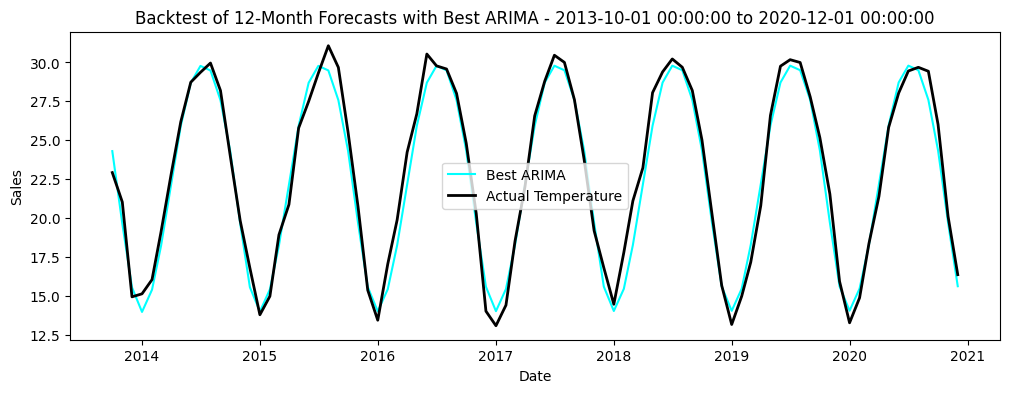

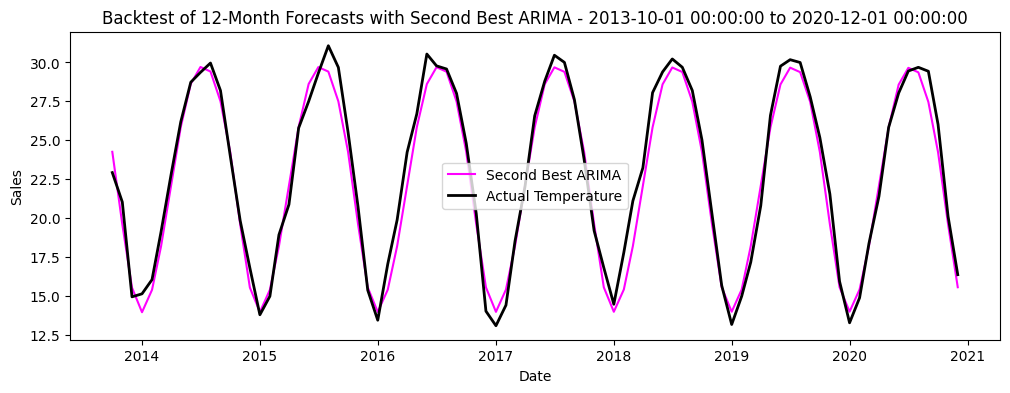

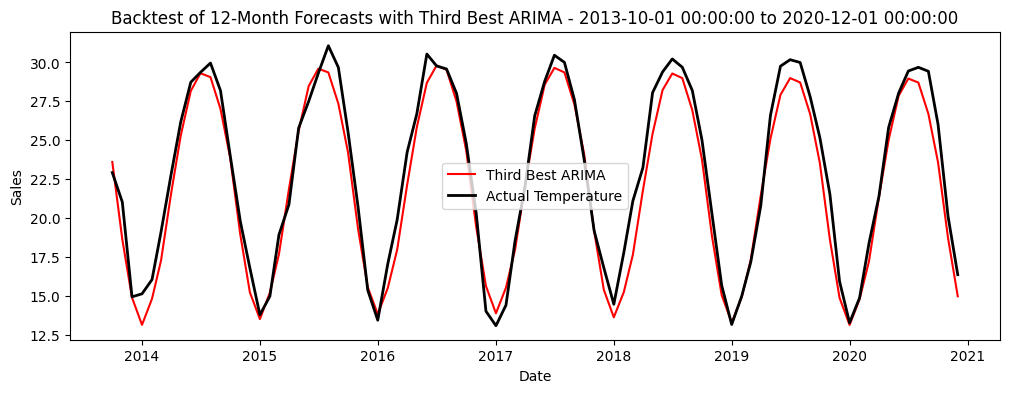

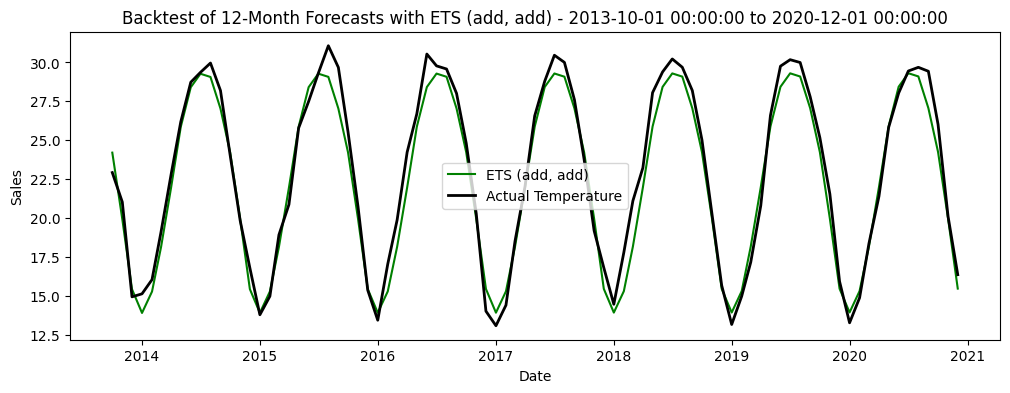

In [63]:
plt.figure(figsize=(12, 4))
plt.plot(temperature_latest_df.index, predictions_best_model_latest, label='Best ARIMA', color = "cyan")
plt.plot(temperature_latest_df.index, temperature_latest_df['AverageTemperature'], label='Actual Temperature', color='black', linewidth=2)
plt.title(f'Backtest of 12-Month Forecasts with Best ARIMA - {temperature_latest_df.index[0]} to {temperature_latest_df.index[-1]}')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

# Plot for ARIMA model 2 "Second Best"
plt.figure(figsize=(12, 4))
plt.plot(temperature_latest_df.index, predictions_second_best_model_latest, label='Second Best ARIMA', color = "magenta")
plt.plot(temperature_latest_df.index, temperature_latest_df['AverageTemperature'], label='Actual Temperature', color='black', linewidth=2)
plt.title(f'Backtest of 12-Month Forecasts with Second Best ARIMA - {temperature_latest_df.index[0]} to {temperature_latest_df.index[-1]}')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

# Plot for ARIMA model 3 "Third Best"
plt.figure(figsize=(12, 4))
plt.plot(temperature_latest_df.index, predictions_third_best_model_latest, label='Third Best ARIMA', color = "red")
plt.plot(temperature_latest_df.index, temperature_latest_df['AverageTemperature'], label='Actual Temperature', color='black', linewidth=2)
plt.title(f'Backtest of 12-Month Forecasts with Third Best ARIMA - {temperature_latest_df.index[0]} to {temperature_latest_df.index[-1]}')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

plt.figure(figsize=(12, 4))
plt.plot(temperature_latest_df.index, predictions_ets_add_add_latest, label='ETS (add, add)', color = "green")
plt.plot(temperature_latest_df.index, temperature_latest_df['AverageTemperature'], label='Actual Temperature', color='black', linewidth=2)
plt.title(f'Backtest of 12-Month Forecasts with ETS (add, add) - {temperature_latest_df.index[0]} to {temperature_latest_df.index[-1]}')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

In [64]:
print(f"MSE for the best ARIMA model: {mse_best_model_latest}")
print(f"MSE for the second best ARIMA model: {mse_second_best_model_latest}")
print(f"MSE for the third best ARIMA model: {mse_third_best_model_latest}")
print(f"MSE for the first best ETS model: {mse_ets_add_add_latest}")

MSE for the best ARIMA model: 0.9875085009258545
MSE for the second best ARIMA model: 1.053892803884991
MSE for the third best ARIMA model: 1.6487873310484884
MSE for the first best ETS model: 1.1822052071510165
